In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'PerformanceScore', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

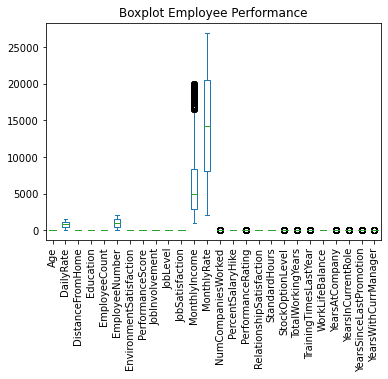

In [4]:
#removing outliers in each columns
plt.figure(figsize=(10,10))
df.plot.box(title='Boxplot Employee Performance',rot=90)

plt.show()

In [5]:
df.shape

(1470, 35)

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

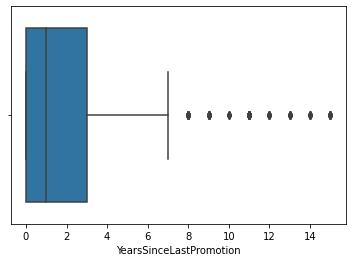

In [6]:
sns.boxplot(df['YearsSinceLastPromotion'])

In [7]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsSinceLastPromotion"].quantile(0.25)
Q3 = df["YearsSinceLastPromotion"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

7.5

In [8]:
#Finding outliers 
np.where(df['YearsSinceLastPromotion']>7.5)

(array([  15,   45,   46,   55,   61,   62,   64,   88,   90,   93,  110,
         123,  126,  178,  186,  190,  194,  210,  218,  231,  237,  251,
         269,  271,  281,  311,  313,  314,  319,  325,  326,  334,  384,
         386,  398,  411,  425,  427,  442,  466,  477,  502,  503,  508,
         514,  526,  535,  544,  584,  595,  653,  690,  695,  701,  729,
         738,  750,  752,  785,  799,  813,  838,  861,  874,  875,  914,
         918,  922,  926,  937,  950,  951,  955,  959,  964,  976,  978,
        1008, 1030, 1043, 1058, 1078, 1084, 1086, 1093, 1138, 1156, 1212,
        1216, 1218, 1221, 1223, 1225, 1242, 1295, 1301, 1303, 1331, 1348,
        1389, 1403, 1409, 1414, 1425, 1444, 1447, 1462], dtype=int64),)

In [9]:
#Removing the outliers of Years Since Last Promotion
df.drop([15,   45,   46,   55,   61,   62,   64,   88,   90,   93,  110,
         123,  126,  178,  186,  190,  194,  210,  218,  231,  237,  251,
         269,  271,  281,  311,  313,  314,  319,  325,  326,  334,  384,
         386,  398,  411,  425,  427,  442,  466,  477,  502,  503,  508,
         514,  526,  535,  544,  584,  595,  653,  690,  695,  701,  729,
         738,  750,  752,  785,  799,  813,  838,  861,  874,  875,  914,
         918,  922,  926,  937,  950,  951,  955,  959,  964,  976,  978,
        1008, 1030, 1043, 1058, 1078, 1084, 1086, 1093, 1138, 1156, 1212,
        1216, 1218, 1221, 1223, 1225, 1242, 1295, 1301, 1303, 1331, 1348,
        1389, 1403, 1409, 1414, 1425, 1444, 1447, 1462],inplace = True)

<AxesSubplot:xlabel='YearsAtCompany'>

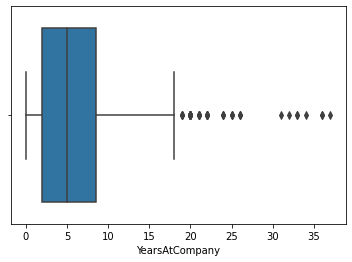

In [10]:
sns.boxplot(df['YearsAtCompany'])

In [11]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["YearsAtCompany"].quantile(0.25)
Q3 = df["YearsAtCompany"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

18.25

In [12]:
#Finding outliers 
np.where(df['YearsAtCompany']>18.25)

(array([  17,   27,   57,   88,  108,  137,  172,  223,  235,  246,  247,
         270,  275,  356,  365,  381,  409,  433,  478,  491,  513,  543,
         566,  626,  653,  690,  693,  695,  726,  730,  753,  842,  848,
         882,  888,  900,  918,  922,  946, 1011, 1026, 1031, 1050, 1054,
        1230, 1252, 1274, 1303, 1339, 1340], dtype=int64),)

In [13]:
#Removing the outliers of YearsAtCompany
df.drop([17,   27,   57,   108,  137,  172,  223,  235,  246,  247,
         270,  275,  356,  365,  381,  409,  433,  478,  491,  513,  543,
         566,  626,  693,  726,  730,  753,  842,  848,
         882,  888,  900,  946, 1011, 1026, 1031, 1050, 1054,
        1230, 1252, 1274, 1339, 1340],inplace = True)


<AxesSubplot:xlabel='NumCompaniesWorked'>

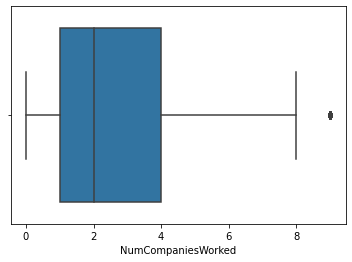

In [14]:
sns.boxplot(df['NumCompaniesWorked'])

In [15]:
#finding upper fence value as the outliers relies after the upper fence
Q1 = df["NumCompaniesWorked"].quantile(0.25)
Q3 = df["NumCompaniesWorked"].quantile(0.75)
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Fence

8.5

In [16]:
#Finding outliers 
np.where(df['NumCompaniesWorked']>8.5)

(array([   4,   35,   45,   82,   92,  107,  175,  185,  216,  250,  253,
         325,  326,  337,  344,  351,  385,  391,  400,  460,  474,  482,
         505,  525,  545,  551,  586,  636,  639,  671,  685,  694,  703,
         728,  749,  826,  844,  851,  890,  920,  994, 1021, 1037, 1047,
        1091, 1128, 1160, 1215, 1295], dtype=int64),)

In [17]:
#Removing the outliers of NumCompaniesWorked
df.drop([4,   35,   82,   92,  107,  175,  185,  216,  250,  253,
         337,  344,  351,  385,  391,  400,  460,  474,  482,
         505,  525,  545,  551,  586,  636,  639,  671,  685,  694,  703,
         728,  749,  826,  844,  851,  890,  920,  994, 1021, 1037, 1047,
        1091, 1128, 1160, 1215],inplace = True)


In [18]:
df.shape

(1275, 35)

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'PerformanceScore', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
#Filtering only the currently working employee's data
df = df[df["Attrition"] == "No"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1067 non-null   int64 
 1   Attrition                 1067 non-null   object
 2   BusinessTravel            1067 non-null   object
 3   DailyRate                 1067 non-null   int64 
 4   Department                1067 non-null   object
 5   DistanceFromHome          1067 non-null   int64 
 6   Education                 1067 non-null   int64 
 7   EducationField            1067 non-null   object
 8   EmployeeCount             1067 non-null   int64 
 9   EmployeeNumber            1067 non-null   int64 
 10  EnvironmentSatisfaction   1067 non-null   int64 
 11  Gender                    1067 non-null   object
 12  PerformanceScore          1067 non-null   int64 
 13  JobInvolvement            1067 non-null   int64 
 14  JobLevel                

In [21]:
#Loading the columns after feature selection
df = df[['MonthlyRate', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'TotalWorkingYears', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceScore']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1 to 1469
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   MonthlyRate              1067 non-null   int64
 1   YearsSinceLastPromotion  1067 non-null   int64
 2   YearsAtCompany           1067 non-null   int64
 3   TotalWorkingYears        1067 non-null   int64
 4   NumCompaniesWorked       1067 non-null   int64
 5   PercentSalaryHike        1067 non-null   int64
 6   PerformanceScore         1067 non-null   int64
dtypes: int64(7)
memory usage: 66.7 KB


In [22]:
print(df["MonthlyRate"].min())
print(df["MonthlyRate"].max())

2094
26997


In [23]:
print(df["YearsSinceLastPromotion"].min())
print(df["YearsSinceLastPromotion"].max())

0
7


In [24]:
print(df["YearsAtCompany"].min())
print(df["YearsAtCompany"].max())

0
37


In [25]:
print(df["TotalWorkingYears"].min())
print(df["TotalWorkingYears"].max())

0
38


In [26]:
print(df["NumCompaniesWorked"].min())
print(df["NumCompaniesWorked"].max())

0
9


In [27]:
conditions = [
    (df['MonthlyRate'] < 2500),
    (df['MonthlyRate'] >= 2500) & (df['MonthlyRate'] < 5000),
    (df['MonthlyRate'] >= 5000) & (df['MonthlyRate'] < 7500),
    (df['MonthlyRate'] >= 7500) & (df['MonthlyRate'] < 10000),
    (df['MonthlyRate'] >= 10000) & (df['MonthlyRate'] < 12500),
    (df['MonthlyRate'] >= 12500) & (df['MonthlyRate'] < 15000),
    (df['MonthlyRate'] >= 15000) & (df['MonthlyRate'] < 17500),
    (df['MonthlyRate'] >= 17500) & (df['MonthlyRate'] < 20000),
    (df['MonthlyRate'] >= 20000) & (df['MonthlyRate'] < 22500),
    (df['MonthlyRate'] >= 22500) & (df['MonthlyRate'] < 25000),
    (df['MonthlyRate'] >= 25000)
    ]

values = ['less than 2500', '2500 & above', '5000 & above', '7500 & above', '10000 & above', 
          '12500 & above', '15000 & above', '17500 & above', '20000 & above',  
          '22500 & above', '25000 & above' ]

df['MonthlyRate_cal'] = np.select(conditions, values)

df.head()

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal
1,24907,1,10,10,1,23,61,22500 & above
3,23159,3,8,8,1,11,56,22500 & above
5,11864,3,7,8,0,13,79,10000 & above
6,9964,0,1,12,4,20,81,7500 & above
7,13335,0,1,1,1,22,67,12500 & above


In [28]:
conditions = [
    (df['YearsAtCompany'] < 2),
    (df['YearsAtCompany'] >= 2) & (df['YearsAtCompany'] < 3),
    (df['YearsAtCompany'] >= 3) & (df['YearsAtCompany'] < 5),
    (df['YearsAtCompany'] >= 5) & (df['YearsAtCompany'] < 7),
    (df['YearsAtCompany'] >= 7) & (df['YearsAtCompany'] < 10),
    (df['YearsAtCompany'] >= 10) & (df['YearsAtCompany'] < 12),
    (df['YearsAtCompany'] >= 12) & (df['YearsAtCompany'] < 15),
    (df['YearsAtCompany'] >= 15) & (df['YearsAtCompany'] < 17),
    (df['YearsAtCompany'] >= 17) & (df['YearsAtCompany'] < 20),
    (df['YearsAtCompany'] >= 20) & (df['YearsAtCompany'] < 22),
    (df['YearsAtCompany'] >= 22) & (df['YearsAtCompany'] < 25),
    (df['YearsAtCompany'] >= 25) & (df['YearsAtCompany'] < 27),
    (df['YearsAtCompany'] >= 27) & (df['YearsAtCompany'] < 30),
    (df['YearsAtCompany'] >= 30) & (df['YearsAtCompany'] < 32),
    (df['YearsAtCompany'] >= 32) & (df['YearsAtCompany'] < 35),
    (df['YearsAtCompany'] >= 35)
    ]

values = ['less than 2 years', 'More than 2 years', 'More than 3 years', 'More than 5 years', 'More than 7 years', 
          'More than 10 years', 'More than 12 years', 'More than 15 years', 'More than 17 years', 'More than 20 years',
          'More than 22 years', 'More than 25 years', 'More than 27 years', 'More than 30 years', 'More than 32 years',
          'More than 35 years' ]

df['YearsAtCompany_cal'] = np.select(conditions, values)

df.head()

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal,YearsAtCompany_cal
1,24907,1,10,10,1,23,61,22500 & above,More than 10 years
3,23159,3,8,8,1,11,56,22500 & above,More than 7 years
5,11864,3,7,8,0,13,79,10000 & above,More than 7 years
6,9964,0,1,12,4,20,81,7500 & above,less than 2 years
7,13335,0,1,1,1,22,67,12500 & above,less than 2 years


In [29]:
conditions = [
    (df['TotalWorkingYears'] < 2),
    (df['TotalWorkingYears'] >= 2) & (df['TotalWorkingYears'] < 3),
    (df['TotalWorkingYears'] >= 3) & (df['TotalWorkingYears'] < 5),
    (df['TotalWorkingYears'] >= 5) & (df['TotalWorkingYears'] < 7),
    (df['TotalWorkingYears'] >= 7) & (df['TotalWorkingYears'] < 10),
    (df['TotalWorkingYears'] >= 10) & (df['TotalWorkingYears'] < 12),
    (df['TotalWorkingYears'] >= 12) & (df['TotalWorkingYears'] < 15),
    (df['TotalWorkingYears'] >= 15) & (df['TotalWorkingYears'] < 17),
    (df['TotalWorkingYears'] >= 17) & (df['TotalWorkingYears'] < 20),
    (df['TotalWorkingYears'] >= 20) & (df['TotalWorkingYears'] < 22),
    (df['TotalWorkingYears'] >= 22) & (df['TotalWorkingYears'] < 25),
    (df['TotalWorkingYears'] >= 25) & (df['TotalWorkingYears'] < 27),
    (df['TotalWorkingYears'] >= 27) & (df['TotalWorkingYears'] < 30),
    (df['TotalWorkingYears'] >= 30) & (df['TotalWorkingYears'] < 32),
    (df['TotalWorkingYears'] >= 32) & (df['TotalWorkingYears'] < 35),
    (df['TotalWorkingYears'] >= 35)
    ]

values = ['less than 2 years', 'More than 2 years', 'More than 3 years', 'More than 5 years', 'More than 7 years', 
          'More than 10 years', 'More than 12 years', 'More than 15 years', 'More than 17 years', 'More than 20 years',
          'More than 22 years', 'More than 25 years', 'More than 27 years', 'More than 30 years', 'More than 32 years',
          'More than 35 years' ]

df['TotalWorkingYears_cal'] = np.select(conditions, values)
df.head()

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal
1,24907,1,10,10,1,23,61,22500 & above,More than 10 years,More than 10 years
3,23159,3,8,8,1,11,56,22500 & above,More than 7 years,More than 7 years
5,11864,3,7,8,0,13,79,10000 & above,More than 7 years,More than 7 years
6,9964,0,1,12,4,20,81,7500 & above,less than 2 years,More than 12 years
7,13335,0,1,1,1,22,67,12500 & above,less than 2 years,less than 2 years


In [30]:
conditions = [
    (df['YearsSinceLastPromotion'] < 1),
    (df['YearsSinceLastPromotion'] >= 1) & (df['YearsSinceLastPromotion'] < 2),
    (df['YearsSinceLastPromotion'] >= 2) & (df['YearsSinceLastPromotion'] < 3),
    (df['YearsSinceLastPromotion'] >= 3) & (df['YearsSinceLastPromotion'] < 4),
    (df['YearsSinceLastPromotion'] >= 4) & (df['YearsSinceLastPromotion'] < 5),
    (df['YearsSinceLastPromotion'] >= 5) & (df['YearsSinceLastPromotion'] < 6),
    (df['YearsSinceLastPromotion'] >= 6) 
    ]

values = ['less than 1 year', 'less than 2 years', 'less than 3 years', 'less than 4 years', 'less than 5 years', 
          'less than 6 years', 'over 6 years' ]

df['YearsSinceLastPromotion_cal'] = np.select(conditions, values)
df.head()

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal
1,24907,1,10,10,1,23,61,22500 & above,More than 10 years,More than 10 years,less than 2 years
3,23159,3,8,8,1,11,56,22500 & above,More than 7 years,More than 7 years,less than 4 years
5,11864,3,7,8,0,13,79,10000 & above,More than 7 years,More than 7 years,less than 4 years
6,9964,0,1,12,4,20,81,7500 & above,less than 2 years,More than 12 years,less than 1 year
7,13335,0,1,1,1,22,67,12500 & above,less than 2 years,less than 2 years,less than 1 year


In [31]:
conditions = [
    (df['NumCompaniesWorked'] < 1),
    (df['NumCompaniesWorked'] >= 1) & (df['NumCompaniesWorked'] < 2),
    (df['NumCompaniesWorked'] >= 2) & (df['NumCompaniesWorked'] < 3),
    (df['NumCompaniesWorked'] >= 3) & (df['NumCompaniesWorked'] < 4),
    (df['NumCompaniesWorked'] >= 4) & (df['NumCompaniesWorked'] < 5),
    (df['NumCompaniesWorked'] >= 5) & (df['NumCompaniesWorked'] < 6),
    (df['NumCompaniesWorked'] >= 6) & (df['NumCompaniesWorked'] < 7),
    (df['NumCompaniesWorked'] >= 7) & (df['NumCompaniesWorked'] < 8),
    (df['NumCompaniesWorked'] >= 8) & (df['NumCompaniesWorked'] < 9),
    (df['NumCompaniesWorked'] >= 9) 
    ]

values = ['less than 1 year', 'less than 2 years', 'less than 3 years', 'less than 4 years', 'less than 5 years', 
          'less than 6 years', 'less than 7 years', 'less than 8 years', 'less than 9 years', 'over 10 years' ]

df['NumCompaniesWorked_cal'] = np.select(conditions, values)
df.head()

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,NumCompaniesWorked_cal
1,24907,1,10,10,1,23,61,22500 & above,More than 10 years,More than 10 years,less than 2 years,less than 2 years
3,23159,3,8,8,1,11,56,22500 & above,More than 7 years,More than 7 years,less than 4 years,less than 2 years
5,11864,3,7,8,0,13,79,10000 & above,More than 7 years,More than 7 years,less than 4 years,less than 1 year
6,9964,0,1,12,4,20,81,7500 & above,less than 2 years,More than 12 years,less than 1 year,less than 5 years
7,13335,0,1,1,1,22,67,12500 & above,less than 2 years,less than 2 years,less than 1 year,less than 2 years


In [32]:
dfExport = df.copy()

In [33]:
#df['YearsSinceLastPromotion'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1 to 1469
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   MonthlyRate                  1067 non-null   int64 
 1   YearsSinceLastPromotion      1067 non-null   int64 
 2   YearsAtCompany               1067 non-null   int64 
 3   TotalWorkingYears            1067 non-null   int64 
 4   NumCompaniesWorked           1067 non-null   int64 
 5   PercentSalaryHike            1067 non-null   int64 
 6   PerformanceScore             1067 non-null   int64 
 7   MonthlyRate_cal              1067 non-null   object
 8   YearsAtCompany_cal           1067 non-null   object
 9   TotalWorkingYears_cal        1067 non-null   object
 10  YearsSinceLastPromotion_cal  1067 non-null   object
 11  NumCompaniesWorked_cal       1067 non-null   object
dtypes: int64(7), object(5)
memory usage: 108.4+ KB


In [34]:
#lblMonthlyIncome = LabelEncoder()
#df['MonthlyIncome'] = lblMonthlyIncome.fit_transform(df['MonthlyIncome'])
#lblDailyRate = LabelEncoder()
#df['DailyRate'] = lblDailyRate.fit_transform(df['DailyRate'])

lblYearsSinceLastPromotion = LabelEncoder()
df['YearsSinceLastPromotion_cal'] = lblYearsSinceLastPromotion.fit_transform(df['YearsSinceLastPromotion_cal'])

lblNumCompaniesWorked = LabelEncoder()
df['NumCompaniesWorked_cal'] = lblNumCompaniesWorked.fit_transform(df['NumCompaniesWorked_cal'])

lblMonthlyRate = LabelEncoder()
df['MonthlyRate_cal'] = lblMonthlyRate.fit_transform(df['MonthlyRate_cal'])

lblYearsAtCompany = LabelEncoder()
df['YearsAtCompany_cal'] = lblYearsAtCompany.fit_transform(df['YearsAtCompany_cal'])

lblTotWorkYear = LabelEncoder()
df['TotalWorkingYears_cal'] = lblTotWorkYear.fit_transform(df['TotalWorkingYears_cal'])

In [35]:
d = dict.fromkeys(df.select_dtypes(np.int32).columns, np.int64)
df = df.astype(d)

In [36]:
#define the dataframe with the calculated columns
#df_cpy = df[['MonthlyRate_cal', 'YearsSinceLastPromotion', 'YearsAtCompany_cal', 'TotalWorkingYears_cal', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceScore']]

df_cpy = df.copy()

In [37]:
x = df_cpy.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyRate", "YearsAtCompany", "TotalWorkingYears", "YearsSinceLastPromotion", "NumCompaniesWorked"], axis=1)
y_psh = df_cpy["PercentSalaryHike"]

In [38]:
x

,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,NumCompaniesWorked_cal
1,5,0,0,1,1
3,5,13,14,3,1
5,0,13,14,3,0
6,9,14,1,0,4
7,1,14,15,0,1
...,...,...,...,...,...
1465,0,12,3,0,4
1466,4,13,14,1,4
1467,8,12,13,0,1
1468,1,13,3,0,2


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y_psh,test_size=0.2,random_state=0)
decsRegressor = DecisionTreeRegressor(random_state=0)
decsRegressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [40]:
y_predict = decsRegressor.predict(x_train)
y_predict

array([13.5       , 20.        , 12.        , 14.5       , 21.        ,
       18.        , 22.        , 13.        , 13.        , 11.5       ,
       18.        , 12.        , 12.        , 16.        , 18.33333333,
       13.        , 19.        , 16.        , 17.        , 12.        ,
       12.        , 15.        , 11.        , 14.        , 17.66666667,
       12.        , 15.        , 12.5       , 15.        , 17.        ,
       11.        , 11.        , 15.75      , 15.6       , 11.        ,
       18.        , 14.        , 13.        , 11.        , 20.        ,
       13.        , 11.        , 13.5       , 11.        , 18.        ,
       12.        , 14.        , 16.        , 14.        , 15.        ,
       17.66666667, 22.        , 18.        , 12.        , 17.        ,
       12.        , 13.66666667, 11.        , 18.        , 12.5       ,
       12.        , 14.        , 15.        , 16.        , 14.        ,
       11.5       , 12.        , 15.        , 15.        , 19.  

In [41]:
predictions = decsRegressor.predict(x)
print(len(predictions))
dfExport["Prediction_PercentSalaryHike"] = predictions

1067


In [42]:
r2score = r2_score(y_train, y_predict)
r2score

0.8051750653216756

In [43]:
#MaxDepth = [None, 2,4,6,8,10,12]
#parameters = {"max_depth": MaxDepth}

#gs = GridSearchCV(decsRegressor, parameters, scoring='neg_mean_squared_error')
#gs.fit(x, y_psh.values)

In [44]:
#decsRegressor = gs.best_estimator_
#decsRegressor

In [45]:
#decsRegressor.fit(x, y_psh)

#y_predict = decsRegressor.predict(x)
#y_predict

In [46]:
#y_predict

In [47]:
df_cpy.columns

Index(['MonthlyRate', 'YearsSinceLastPromotion', 'YearsAtCompany',
       'TotalWorkingYears', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceScore', 'MonthlyRate_cal', 'YearsAtCompany_cal',
       'TotalWorkingYears_cal', 'YearsSinceLastPromotion_cal',
       'NumCompaniesWorked_cal'],
      dtype='object')

In [48]:
x

,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,NumCompaniesWorked_cal
1,5,0,0,1,1
3,5,13,14,3,1
5,0,13,14,3,0
6,9,14,1,0,4
7,1,14,15,0,1
...,...,...,...,...,...
1465,0,12,3,0,4
1466,4,13,14,1,4
1467,8,12,13,0,1
1468,1,13,3,0,2


In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1 to 1469
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   MonthlyRate_cal              1067 non-null   int64
 1   YearsAtCompany_cal           1067 non-null   int64
 2   TotalWorkingYears_cal        1067 non-null   int64
 3   YearsSinceLastPromotion_cal  1067 non-null   int64
 4   NumCompaniesWorked_cal       1067 non-null   int64
dtypes: int64(5)
memory usage: 50.0 KB


In [50]:
x = np.array([["15000 & above", "More than 12 years", "More than 10 years", "less than 4 years", "less than 2 years" ]])
x

array([['15000 & above', 'More than 12 years', 'More than 10 years',
        'less than 4 years', 'less than 2 years']], dtype='<U18')

In [51]:
lblNumCompaniesWorked.classes_

array(['less than 1 year', 'less than 2 years', 'less than 3 years',
       'less than 4 years', 'less than 5 years', 'less than 6 years',
       'less than 7 years', 'less than 8 years', 'less than 9 years',
       'over 10 years'], dtype=object)

In [52]:
x[:, 0] = lblMonthlyRate.transform(x[:, 0])
x[:, 1] = lblYearsAtCompany.transform(x[:, 1])
x[:, 2] = lblTotWorkYear.transform(x[:, 2])
x[:, 3] = lblYearsSinceLastPromotion.transform(x[:, 3])
x[:, 4] = lblNumCompaniesWorked.transform(x[:, 4])

x =  x.astype(float)
x

array([[2., 1., 0., 3., 1.]])

In [53]:
y_pred = decsRegressor.predict(x)
y_pred

array([16.66666667])

In [54]:
import pickle

data = {"model":decsRegressor, "lblMonthlyRate": lblMonthlyRate, "lblYearsAtCompany": lblYearsAtCompany, 
        "lblTotWorkYear": lblTotWorkYear, "lblYearsSinceLastPromotion": lblYearsSinceLastPromotion, 
        "lblNumCompaniesWorked": lblNumCompaniesWorked} 
with open('EEP_MLScript_PercentSalaryHike.pkl', 'wb') as file:
    pickle.dump(data, file)

In [55]:
with open('EEP_MLScript_PercentSalaryHike.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
lblMonthlyRate = data["lblMonthlyRate"]
lblYearsAtCompany = data["lblYearsAtCompany"]
lblTotWorkYear = data["lblTotWorkYear"]
lblYearsSinceLastPromotion = data["lblYearsSinceLastPromotion"]
lblNumCompaniesWorked = data["lblNumCompaniesWorked"]

y_pred = regressor_loaded.predict(x)
y_pred

array([16.66666667])

In [56]:
df.columns

Index(['MonthlyRate', 'YearsSinceLastPromotion', 'YearsAtCompany',
       'TotalWorkingYears', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceScore', 'MonthlyRate_cal', 'YearsAtCompany_cal',
       'TotalWorkingYears_cal', 'YearsSinceLastPromotion_cal',
       'NumCompaniesWorked_cal'],
      dtype='object')

In [57]:
df_cpy2 = df.copy()
df_cpy2

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,NumCompaniesWorked_cal
1,24907,1,10,10,1,23,61,5,0,0,1,1
3,23159,3,8,8,1,11,56,5,13,14,3,1
5,11864,3,7,8,0,13,79,0,13,14,3,0
6,9964,0,1,12,4,20,81,9,14,1,0,4
7,13335,0,1,1,1,22,67,1,14,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,12290,0,5,17,4,17,41,0,12,3,0,4
1466,21457,1,7,9,4,15,42,4,13,14,1,4
1467,5174,0,6,6,1,20,87,8,12,13,0,1
1468,13243,0,9,17,2,14,63,1,13,3,0,2


In [58]:
x = df_cpy.drop(["PercentSalaryHike", "PerformanceScore", "MonthlyRate", "YearsAtCompany", "TotalWorkingYears", "YearsSinceLastPromotion", "NumCompaniesWorked"], axis=1)
y_psc = df_cpy["PerformanceScore"]

In [59]:
x_train_psc, x_test_psc, y_train_psc, y_test_psc = train_test_split(x,y_psc,test_size=0.2,random_state=0)
decsRegressor = DecisionTreeRegressor(random_state=0)
decsRegressor.fit(x_train_psc, y_train_psc)

DecisionTreeRegressor(random_state=0)

In [60]:
y_predict_psc = decsRegressor.predict(x_train)
y_predict_psc

array([ 73.66666667,  36.        ,  90.        ,  77.5       ,
        71.        ,  86.        ,  73.        ,  81.        ,
        40.        ,  45.        ,  65.        ,  75.        ,
        98.        ,  74.        ,  78.66666667,  83.        ,
        87.        ,  92.        ,  43.        ,  46.        ,
        57.        ,  54.        ,  53.        ,  35.        ,
        53.        ,  37.        ,  50.        ,  69.        ,
        65.33333333,  86.        ,  86.        ,  57.        ,
        61.25      ,  83.        , 100.        ,  76.        ,
        79.        ,  87.        ,  48.        ,  76.        ,
        64.        ,  37.        ,  73.66666667,  68.5       ,
        75.        ,  82.5       ,  68.        ,  97.        ,
        37.        ,  86.        ,  40.        ,  78.        ,
        75.        ,  48.        ,  55.        ,  44.        ,
        61.33333333,  99.        ,  47.        ,  56.        ,
        56.        ,  61.        ,  96.        ,  43.  

In [61]:
r2score_psc = r2_score(y_train_psc, y_predict_psc)
r2score_psc

0.8228706529482113

In [62]:
x = np.array([["15000 & above", "More than 12 years", "More than 10 years", "less than 4 years", "less than 2 years" ]])
x

array([['15000 & above', 'More than 12 years', 'More than 10 years',
        'less than 4 years', 'less than 2 years']], dtype='<U18')

In [63]:
x[:, 0] = lblMonthlyRate.transform(x[:, 0])
x[:, 1] = lblYearsAtCompany.transform(x[:, 1])
x[:, 2] = lblTotWorkYear.transform(x[:, 2])
x[:, 3] = lblYearsSinceLastPromotion.transform(x[:, 3])
x[:, 4] = lblNumCompaniesWorked.transform(x[:, 4])

x =  x.astype(float)
x

array([[2., 1., 0., 3., 1.]])

In [64]:
y_pred = decsRegressor.predict(x)
y_pred

array([76.])

In [65]:
data = {"model":decsRegressor, "lblMonthlyRate": lblMonthlyRate, "lblYearsAtCompany": lblYearsAtCompany, 
        "lblTotWorkYear": lblTotWorkYear, "lblYearsSinceLastPromotion": lblYearsSinceLastPromotion, 
        "lblNumCompaniesWorked": lblNumCompaniesWorked} 
with open('EEP_MLScript_PerformanceScore.pkl', 'wb') as file:
    pickle.dump(data, file)

In [66]:
with open('EEP_MLScript_PerformanceScore.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
lblMonthlyRate = data["lblMonthlyRate"]
lblYearsAtCompany = data["lblYearsAtCompany"]
lblTotWorkYear = data["lblTotWorkYear"]
lblYearsSinceLastPromotion = data["lblYearsSinceLastPromotion"]
lblNumCompaniesWorked = data["lblNumCompaniesWorked"]

y_pred = regressor_loaded.predict(x)
y_pred

array([76.])

In [67]:
dfExport.columns

Index(['MonthlyRate', 'YearsSinceLastPromotion', 'YearsAtCompany',
       'TotalWorkingYears', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceScore', 'MonthlyRate_cal', 'YearsAtCompany_cal',
       'TotalWorkingYears_cal', 'YearsSinceLastPromotion_cal',
       'NumCompaniesWorked_cal', 'Prediction_PercentSalaryHike'],
      dtype='object')

In [68]:
dfExport

,MonthlyRate,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,PercentSalaryHike,PerformanceScore,MonthlyRate_cal,YearsAtCompany_cal,TotalWorkingYears_cal,YearsSinceLastPromotion_cal,NumCompaniesWorked_cal,Prediction_PercentSalaryHike
1,24907,1,10,10,1,23,61,22500 & above,More than 10 years,More than 10 years,less than 2 years,less than 2 years,17.666667
3,23159,3,8,8,1,11,56,22500 & above,More than 7 years,More than 7 years,less than 4 years,less than 2 years,17.000000
5,11864,3,7,8,0,13,79,10000 & above,More than 7 years,More than 7 years,less than 4 years,less than 1 year,13.000000
6,9964,0,1,12,4,20,81,7500 & above,less than 2 years,More than 12 years,less than 1 year,less than 5 years,20.000000
7,13335,0,1,1,1,22,67,12500 & above,less than 2 years,less than 2 years,less than 1 year,less than 2 years,17.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,12290,0,5,17,4,17,41,10000 & above,More than 5 years,More than 17 years,less than 1 year,less than 5 years,17.000000
1466,21457,1,7,9,4,15,42,20000 & above,More than 7 years,More than 7 years,less than 2 years,less than 5 years,15.000000
1467,5174,0,6,6,1,20,87,5000 & above,More than 5 years,More than 5 years,less than 1 year,less than 2 years,13.500000
1468,13243,0,9,17,2,14,63,12500 & above,More than 7 years,More than 17 years,less than 1 year,less than 3 years,19.000000


In [69]:
conditions = [
    (dfExport['Prediction_PercentSalaryHike'] < 5),
    (dfExport['Prediction_PercentSalaryHike'] >= 5) & (dfExport['Prediction_PercentSalaryHike'] < 10),
    (dfExport['Prediction_PercentSalaryHike'] >= 10) & (dfExport['Prediction_PercentSalaryHike'] < 15),
    (dfExport['Prediction_PercentSalaryHike'] >= 15) & (dfExport['Prediction_PercentSalaryHike'] < 20),
    (dfExport['Prediction_PercentSalaryHike'] >= 20) & (dfExport['Prediction_PercentSalaryHike'] < 25),
    (dfExport['Prediction_PercentSalaryHike'] >= 25)
    ]

vals = [1, 2, 3, 4, 5, 6]

dfExport['Prediction_PercentSalaryHike_cal'] = np.select(conditions, vals)

In [70]:
dfExport.to_csv('Calculated_Employee_Dataset.csv')